#### I guess error is due to you are using function of numpy on sympy, which is beause the interpretar gets confused as between numpy and sympy methods, so so either use sp or np

In [ ]:
!pip install sympy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import scipy.integrate as integrate
from sympy import symbols, Matrix
import sympy as sp
from sympy import series

In [3]:
tau_x = np.array([[0.0, 1.0], [1.0, 0.0]])
tau_y = np.array([[0.0, complex(0.0, -1.0)], [ complex(0.0, 1.0), 0.0]])
tau_z = np.array([[1.0, 0.0], [0.0, -1.0]])
# alpha, beta, T, kx, e= 0, 0, 2, 0, 0.1
kx = sp.symbols('kx', real = True)
J_0, J_S, e, T, alpha, beta = sp.symbols('J_0, J_S, e, T, alpha, beta')

J_0 = 3*alpha/(4*T)
J_S = 3*beta/(2*T)

#### Define H and Heff - figure out how this is different from Floquet Hamiltonian H

In [4]:
M1 = complex(0, -1)*sp.Matrix([[0, (J_0*T/3)+(J_S*T*sp.exp(kx*complex(0,1))/6)],[(J_0*T/3)+(J_S*T*sp.exp(kx*complex(0,1))/6),0]])
M2 =  (T/2)*complex(0, 1)*sp.Matrix([[2*sp.pi/T, -(J_0*T/(3*sp.log(e)))-(J_S*T*sp.exp(kx*complex(0,1))/(6*sp.log(e)))],[-(J_0*T/(3*sp.log(e)))-(J_S*T*sp.exp(kx*complex(0,1))/(6*sp.log(e))),2*sp.pi/T]])

In [5]:
print(M1)

Matrix([[0, -1.0*I*(alpha/4 + beta*exp(1.0*I*kx)/4)], [-1.0*I*(alpha/4 + beta*exp(1.0*I*kx)/4), 0]])


(-1.0*(0.333333333333333*I*J_0*T + 0.166666666666667*I*J_S*T*exp(1.0*I*kx))*(-0.0138888888888889*J_0**2*T**4*log(e)**2 - 0.0138888888888889*J_0*J_S*T**4*exp(1.0*I*kx)*log(e)**2 - 0.00347222222222222*J_S**2*T**4*exp(2.0*I*kx)*log(e)**2 - 0.5*pi**2*log(e)**4 + 1.0*log(e)**4 + 1.0*I*pi*log(e)**4)/((0.00308641975308642*J_0**4*T**4 + 0.00617283950617284*J_0**3*J_S*T**4*exp(1.0*I*kx) + 0.00462962962962963*J_0**2*J_S**2*T**4*exp(2.0*I*kx) + 0.00154320987654321*J_0*J_S**3*T**4*exp(3.0*I*kx) + 0.000192901234567901*J_S**4*T**4*exp(4.0*I*kx) + 1.0)*(0.000192901234567901*J_0**4*T**8 + 0.000385802469135802*J_0**3*J_S*T**8*exp(1.0*I*kx) + 0.000289351851851852*J_0**2*J_S**2*T**8*exp(2.0*I*kx) - 0.0138888888888889*pi**2*J_0**2*T**4*log(e)**2 + 0.0277777777777778*I*pi*J_0**2*T**4*log(e)**2 + 9.64506172839506e-5*J_0*J_S**3*T**8*exp(3.0*I*kx) - 0.0138888888888889*pi**2*J_0*J_S*T**4*exp(1.0*I*kx)*log(e)**2 + 0.0277777777777778*I*pi*J_0*J_S*T**4*exp(1.0*I*kx)*log(e)**2 + 1.20563271604938e-5*J_S**4*T**8*exp

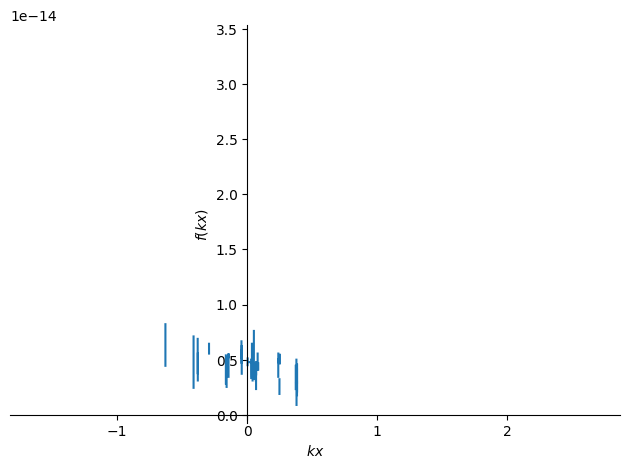

AttributeError: ignored

In [11]:
J_0, J_S, kx, e, T = symbols('J_0, J_S, kx, e, T')
M1 = complex(0, -1)*sp.Matrix([[0, (J_0*T/3)+(J_S*T*sp.exp(kx*complex(0,1))/6)],[(J_0*T/3)+(J_S*T*sp.exp(kx*complex(0,1))/6),0]])
M2 =  (T/2)*complex(0, 1)*sp.Matrix([[2*sp.pi/T, -(J_0*T/(3*sp.log(e)))-(J_S*T*sp.exp(kx*complex(0,1))/(6*sp.log(e)))],[-(J_0*T/(3*sp.log(e)))-(J_S*T*sp.exp(kx*complex(0,1))/(6*sp.log(e))),2*sp.pi/T]])
def matrix_taylor_expansion(X, order):
    # Get the dimension of the matrix
    n = X.shape[0]

    # Create the identity matrix of the same dimension
    I = sp.eye(n)

    # Initialize the Taylor series expansion with the identity matrix
    taylor_expansion = I

    # Compute the Taylor series terms up to the specified order
    for k in range(1, order+1):
        term = X**k / sp.factorial(k)
        taylor_expansion += term

    return taylor_expansion

# X = complex(0, -1)*sp.Matrix([[x, 1], [1, x]])
# print(X)

# Set the desired order of the Taylor series expansion
order = 2

# Compute the Taylor series expansion of e^X
taylor_expansion1 = matrix_taylor_expansion(M1, order)
taylor_expansion2 = matrix_taylor_expansion(M2, order)

# print(M1)
# print(taylor_expansion1)

Product = taylor_expansion1 @ taylor_expansion2
Inv_taylor_expansion1 = taylor_expansion1.inv()
Inv_taylor_expansion2 = taylor_expansion2.inv()
Inv_Product = Inv_taylor_expansion2 @ Inv_taylor_expansion1
# print(Inv_Product)

Product_dx = Product.diff(kx)
# print(Product)
# print(Product_dx)

FM1 = tau_z @ Inv_Product
final_matrix = FM1 @ Product_dx
Trace_FM1 = sp.trace(final_matrix)
print(Trace_FM1)
result = sp.integrate(Trace_FM1, (kx, -1, 1))
print(result)
Trace_FM1 = Trace_FM1.subs('J_0', 3*1.8*sp.pi/(2*2*sp.pi)).subs('J_S', 3*1.8*sp.pi/(2*2*sp.pi)).subs('e', 0.1).subs('T', 2*sp.pi)
# sp.latex(Trace_FM1)
plt = sp.plot(Trace_FM1, (kx, -sp.pi, sp.pi))
data_points = plt.get_plot_data()
print(data_points)
print(plt)

In [ ]:
nested_list = taylor_expansion.tolist()

# Convert the nested list to a NumPy array
array = np.array(nested_list)

# Print the NumPy array
print(array)

[[-0.0555555555555556*J_0**2*T**2 - 0.0555555555555556*J_0*J_S*T**2*exp(1.0*I*kx) - 0.0138888888888889*J_S**2*T**2*exp(2.0*I*kx) + 1
  -1.0*I*(J_0*T/3 + J_S*T*exp(1.0*I*kx)/6)]
 [-1.0*I*(J_0*T/3 + J_S*T*exp(1.0*I*kx)/6)
  -0.0555555555555556*J_0**2*T**2 - 0.0555555555555556*J_0*J_S*T**2*exp(1.0*I*kx) - 0.0138888888888889*J_S**2*T**2*exp(2.0*I*kx) + 1]]


In [ ]:
!pip install qiskit
import numpy as np
import matplotlib.pyplot as plt
import qiskit
from qiskit import IBMQ, Aer,QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, assemble,  Parameter
from qiskit.quantum_info import Kraus, SuperOp
from qiskit_aer import AerSimulator
from qiskit.tools.visualization import plot_histogram


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 71.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 65.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 14.8 MB/s eta 0:00:00


In [ ]:
def corr(q, c, system, ancillae, g, t, i):
    coA = QuantumCircuit(q,c)

    # State Preparation
    coA.h(q[system])
    coA.h(q[ancillae[2]])
    coA.cnot(q[ancillae[2]],q[ancillae[1]])
    coA.cnot(q[ancillae[2]],q[ancillae[0]])

    # Collisions between the system and ancilla qubits
    for j in range(1, i+1, 1):
        if j%2 != 0:
            coA.cnot(q[ancillae[0]],q[system])
            coA.rz(t, q[system])
            coA.cnot(q[ancillae[0]],q[system])
        else:
            coA.cnot(q[ancillae[1]],q[system])
            coA.rz(t, q[system])
            coA.cnot(q[ancillae[1]],q[system])

    coA.h(q[system])

    coA.measure(q[system],c[0])

    return coA

In [ ]:
def U1(circ, alpha, beta, i, Js, *args):
  circ.CNOT(i, i+1)
  circ.RZ(6*np.pi/4)
  t = Parameter('t')
  circ.RY(-Js*t)
  circ.CNOT(i+1,i)
  circ.RY(Js*t)
  circ.CNOT(i+1,i)
  circ.RZ(-6*np.pi/4)
  return circ

def wn(q,c,alpha, beta, n, *args):
  circ = QuantumCircuit(q, c)

  # State Preparation
  circ.X(q[2])
  for i in range(n-1):
    k = U1(circ, alpha, beta, i, 3*alpha/(4*T))
    circ = circ + k

  for i in range(1, n-1, 1):
    g = U1(circ, alpha, beta, i, 3*beta/(2*T))
    circ = circ + g

  for i in range(n-1):
    f = U1(circ, alpha, beta, i, 3*alpha/(4*T))
    circ = circ + f
  circ.draw(output="mpl")
  pass

# New Section